In [1]:

# Importing libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/challenge-data/Plant Dataset/Healthy Plant/IMG_20231122_145957899_BURST0019.jpg
/kaggle/input/challenge-data/Plant Dataset/Healthy Plant/IMG_20231122_145729490_BURST0018.jpg
/kaggle/input/challenge-data/Plant Dataset/Healthy Plant/IMG_20231122_145739488_BURST0013.jpg
/kaggle/input/challenge-data/Plant Dataset/Healthy Plant/IMG_20231122_150047690_BURST0002.jpg
/kaggle/input/challenge-data/Plant Dataset/Healthy Plant/IMG_20231122_150052394_BURST0002.jpg
/kaggle/input/challenge-data/Plant Dataset/Healthy Plant/IMG_20231122_145957899_BURST0001_COVER.jpg
/kaggle/input/challenge-data/Plant Dataset/Healthy Plant/IMG_20231122_145933264_BURST0005.jpg
/kaggle/input/challenge-data/Plant Dataset/Healthy Plant/IMG_20231122_145911340_BURST0004.jpg
/kaggle/input/challenge-data/Plant Dataset/Healthy Plant/IMG_20231122_145739488_BURST0020.jpg
/kaggle/input/challenge-data/Plant Dataset/Healthy Plant/IMG_20231122_145943870_BURST0007.jpg
/kaggle/input/challenge-data/Plant Dataset/Healthy Pla

In [3]:
healthy_path = '/kaggle/input/challenge-data/Plant Dataset/Healthy Plant'
unhealthy_path = '/kaggle/input/challenge-data/Plant Dataset/Unhealthy Plant'

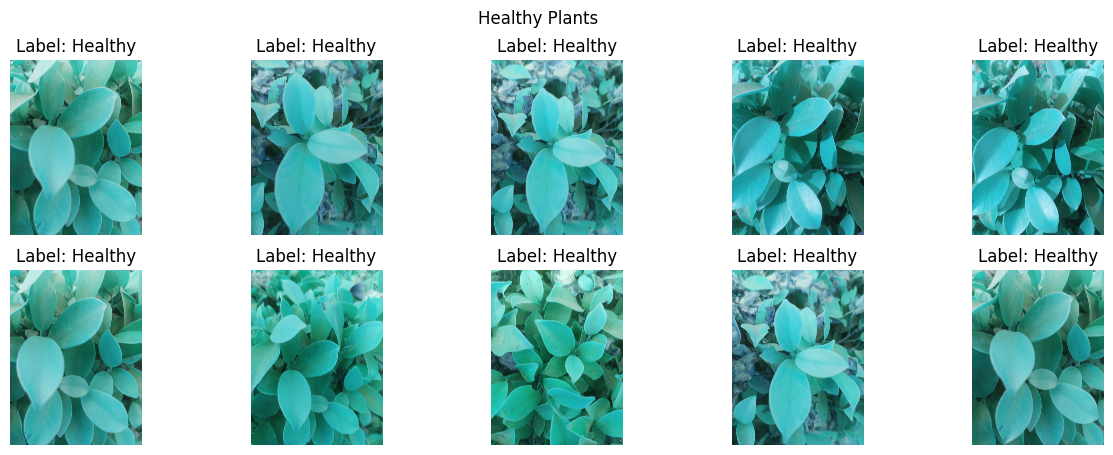

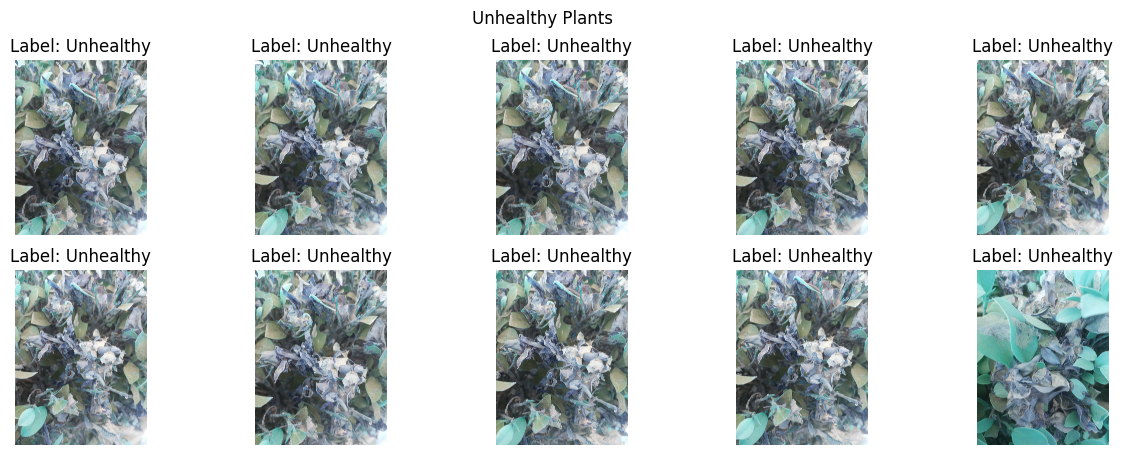

In [4]:
# Function to display images with labels
def display_images(images, labels, title):
    plt.figure(figsize=(15, 5))
    for i in range(10):  # Display the first 10 images
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i]}")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

# Load and display healthy images with labels
healthy_images = [cv2.imread(os.path.join(healthy_path, filename)) for filename in os.listdir(healthy_path)[:10]]
healthy_labels = ['Healthy'] * 10
display_images(healthy_images, healthy_labels, title='Healthy Plants')

# Load and display unhealthy images with labels
unhealthy_images = [cv2.imread(os.path.join(unhealthy_path, filename)) for filename in os.listdir(unhealthy_path)[:10]]
unhealthy_labels = ['Unhealthy'] * 10
display_images(unhealthy_images, unhealthy_labels, title='Unhealthy Plants')

Text(0.5, 1.0, 'healthy vs Unhealthy samples in data set')

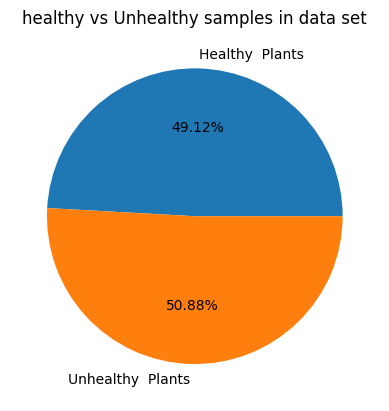

In [5]:
plt.pie ([len(healthy_path), len(unhealthy_path)], labels = ['Healthy  Plants', 
                                                                      'Unhealthy  Plants'],autopct='%1.2f%%')
plt.title('healthy vs Unhealthy samples in data set')

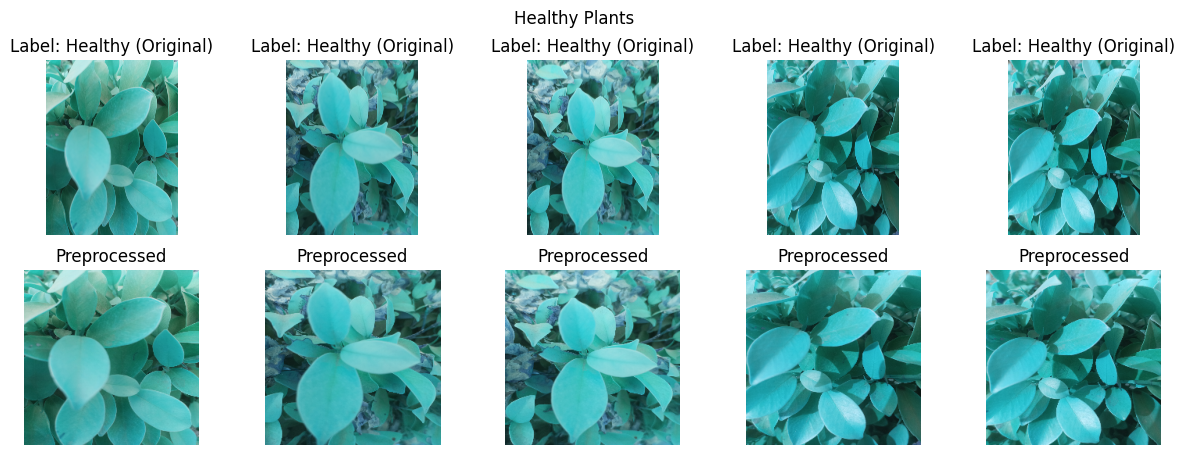

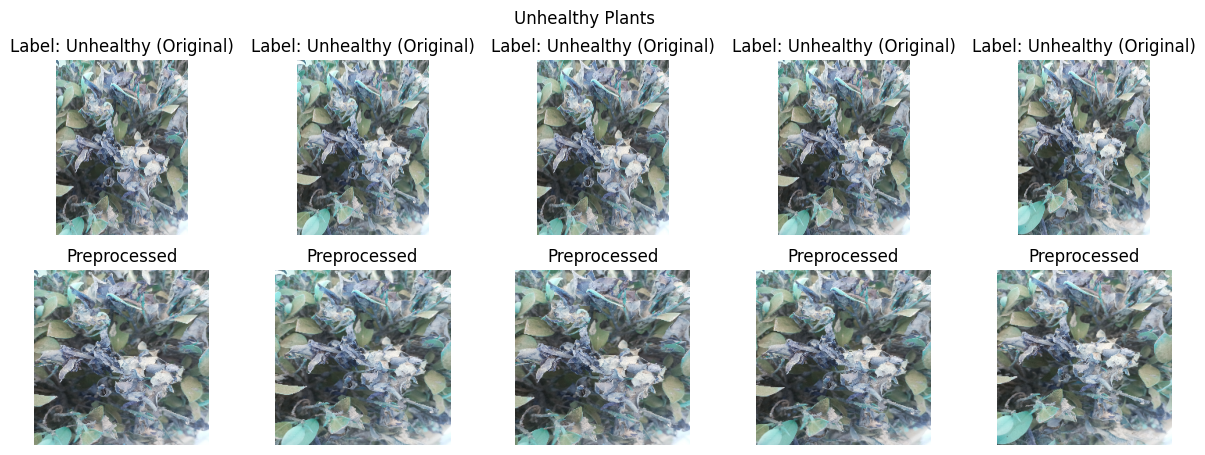

In [6]:
# Function to preprocess images
def preprocess_images(images, target_size=(224, 224)):
    preprocessed_images = []
    for img in images:
        # Resize images to a consistent size
        resized_img = cv2.resize(img, target_size)
        # Normalize pixel values to [0, 1]
        normalized_img = resized_img / 255.0
        preprocessed_images.append(normalized_img)
    return np.array(preprocessed_images)

# Function to display original and preprocessed images
def display_images(original_images, preprocessed_images, labels, title):
    plt.figure(figsize=(15, 5))
    for i in range(5):
        plt.subplot(2, 5, i + 1)
        plt.imshow(original_images[i])
        plt.title(f"Label: {labels[i]} (Original)")
        plt.axis("off")
        
        plt.subplot(2, 5, i + 6)
        plt.imshow(preprocessed_images[i])
        plt.title("Preprocessed")
        plt.axis("off")

    plt.suptitle(title)
    plt.show()

# Load images from healthy folder
healthy_images = [cv2.imread(os.path.join(healthy_path, filename)) for filename in os.listdir(healthy_path)[:5]]
healthy_labels = ['Healthy'] * 5

# Load images from unhealthy folder
unhealthy_images = [cv2.imread(os.path.join(unhealthy_path, filename)) for filename in os.listdir(unhealthy_path)[:5]]
unhealthy_labels = ['Unhealthy'] * 5

# Preprocess images
preprocessed_healthy_images = preprocess_images(healthy_images)
preprocessed_unhealthy_images = preprocess_images(unhealthy_images)

# Display original and preprocessed images
display_images(healthy_images, preprocessed_healthy_images, healthy_labels, title='Healthy Plants')
display_images(unhealthy_images, preprocessed_unhealthy_images, unhealthy_labels, title='Unhealthy Plants')



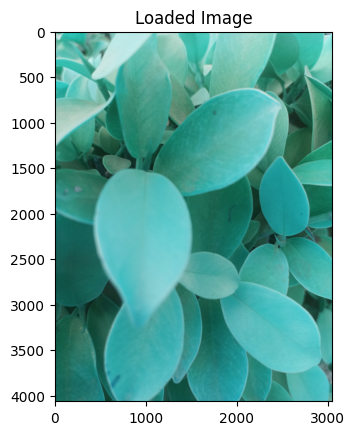

Preprocessed Image - Shape: (224, 224, 3) Min: 0.00784313725490196 Max: 0.9686274509803922 Dtype: float64
Preprocessed Image - Shape: (224, 224, 3) Min: 0.0 Max: 0.9176470588235294 Dtype: float64
Preprocessed Image - Shape: (224, 224, 3) Min: 0.011764705882352941 Max: 1.0 Dtype: float64
Preprocessed Image - Shape: (224, 224, 3) Min: 0.00392156862745098 Max: 0.996078431372549 Dtype: float64
Preprocessed Image - Shape: (224, 224, 3) Min: 0.0 Max: 1.0 Dtype: float64


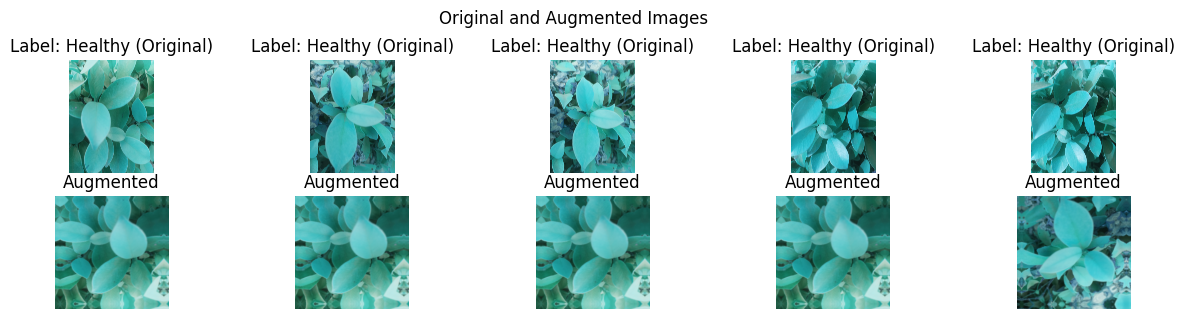

Preprocessed Image - Shape: (224, 224, 3) Min: 0.0784313725490196 Max: 1.0 Dtype: float64
Preprocessed Image - Shape: (224, 224, 3) Min: 0.09019607843137255 Max: 1.0 Dtype: float64
Preprocessed Image - Shape: (224, 224, 3) Min: 0.054901960784313725 Max: 1.0 Dtype: float64
Preprocessed Image - Shape: (224, 224, 3) Min: 0.07450980392156863 Max: 1.0 Dtype: float64
Preprocessed Image - Shape: (224, 224, 3) Min: 0.09411764705882353 Max: 1.0 Dtype: float64


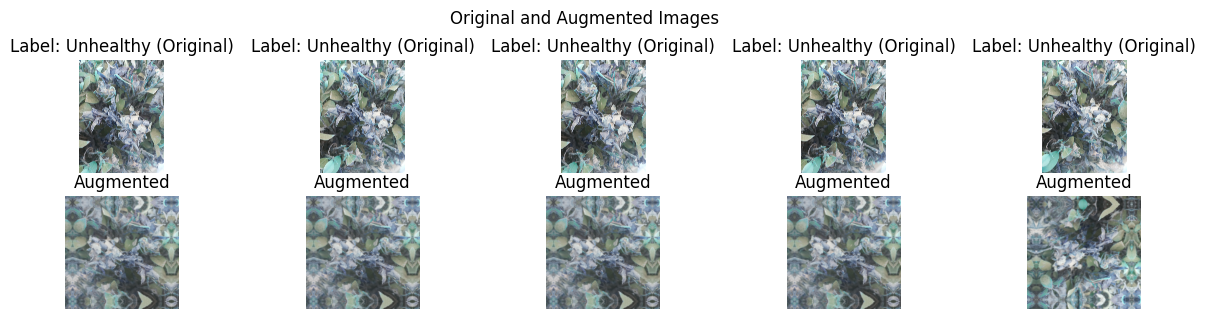

In [7]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
import tensorflow as tf
# Function to preprocess and augment images
def preprocess_and_augment(images, labels, augmentations=1, target_size=(224, 224)):
    augmented_images = []
    augmented_labels = []
    
    # Data augmentation using TensorFlow Sequential model
    data_augmentation = tf.keras.Sequential([
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        layers.experimental.preprocessing.RandomRotation(0.2),
        layers.experimental.preprocessing.RandomZoom(0.2),
        layers.experimental.preprocessing.RandomContrast(0.2),
    ])

    for img, label in zip(images, labels):
        # Reshape the image to (height, width, channels) for flow() function
        img = cv2.resize(img, target_size)
        
        # Preprocess the original image
        preprocessed_img = img / 255.0
        print("Preprocessed Image - Shape:", preprocessed_img.shape, "Min:", np.min(preprocessed_img), "Max:", np.max(preprocessed_img), "Dtype:", preprocessed_img.dtype)
        
        # Apply data augmentation
        augmented_img = data_augmentation(tf.expand_dims(preprocessed_img, 0))
        augmented_img = tf.squeeze(augmented_img)
        
        # Generate augmented images
        for _ in range(augmentations):
            augmented_images.append(augmented_img.numpy())
            augmented_labels.append(label)
    
    return np.array(augmented_images), np.array(augmented_labels)

# Function to preprocess and display original and preprocessed images
def preprocess_and_display(images, labels, augmentations=1, target_size=(224, 224)):
    # Preprocess and augment images
    preprocessed_images, preprocessed_labels = preprocess_and_augment(images, labels, augmentations, target_size)

    # Display original and preprocessed images
    plt.figure(figsize=(15, 5))
    for i in range(5):
        plt.subplot(3, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i]} (Original)")
        plt.axis("off")
        
        plt.subplot(3, 5, i + 6)
        plt.imshow(preprocessed_images[i])
        plt.title("Augmented")
        plt.axis("off")

    plt.suptitle('Original and Augmented Images')
    plt.show()

# Load images from healthy folder
healthy_images = [cv2.imread(os.path.join(healthy_path, filename)) for filename in os.listdir(healthy_path)[:5]]
healthy_labels = ['Healthy'] * 5

# Load images from unhealthy folder
unhealthy_images = [cv2.imread(os.path.join(unhealthy_path, filename)) for filename in os.listdir(unhealthy_path)[:5]]
unhealthy_labels = ['Unhealthy'] * 5

# Display one loaded image to verify loading
plt.imshow(healthy_images[0])
plt.title("Loaded Image")
plt.show()

# Preprocess and display images with augmentation using TensorFlow's Sequential model
preprocess_and_display(healthy_images, healthy_labels, augmentations=4)
preprocess_and_display(unhealthy_images, unhealthy_labels, augmentations=4)

In [9]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Function to load and preprocess images with resizing
def load_and_resize_images(folder_path, label, target_size=(224, 224)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        
        # Resize the image to a target size
        img = cv2.resize(img, target_size)
        
        # Perform any additional preprocessing if needed
        images.append(img)
        labels.append(label)
    
    return images, labels

# Load healthy plant images and labels with resizing
healthy_images, healthy_labels = load_and_resize_images(healthy_path, label=0)

# Load unhealthy plant images and labels with resizing
unhealthy_images, unhealthy_labels = load_and_resize_images(unhealthy_path, label=1)

# Combine the datasets
X = np.concatenate((healthy_images, unhealthy_images), axis=0)
y = np.concatenate((healthy_labels, unhealthy_labels), axis=0)

# Convert labels to numpy array
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=2)
y_test_one_hot = to_categorical(y_test, num_classes=2)

# Build the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))  # 2 classes: Healthy and Unhealthy

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_one_hot, epochs=10, validation_data=(X_test, y_test_one_hot),batch_size=32)







Epoch 1/10
24/24 [==============================] - 3s 56ms/step - loss: 29.3099 - accuracy: 0.6940 - val_loss: 0.1739 - val_accuracy: 0.9427
Epoch 2/10
24/24 [==============================] - 1s 44ms/step - loss: 0.1030 - accuracy: 0.9674 - val_loss: 9.8123e-04 - val_accuracy: 1.0000
Epoch 3/10
24/24 [==============================] - 1s 44ms/step - loss: 0.0686 - accuracy: 0.9714 - val_loss: 5.8338e-04 - val_accuracy: 1.0000
Epoch 4/10
24/24 [==============================] - 1s 43ms/step - loss: 0.1822 - accuracy: 0.9661 - val_loss: 1.2849e-04 - val_accuracy: 1.0000
Epoch 5/10
24/24 [==============================] - 1s 44ms/step - loss: 0.0679 - accuracy: 0.9792 - val_loss: 7.0378e-05 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 1s 43ms/step - loss: 0.1810 - accuracy: 0.9792 - val_loss: 4.7521e-05 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 1s 44ms/step - loss: 0.0707 - accuracy: 0.9753 - val_loss: 0.0012 - val_accuracy:

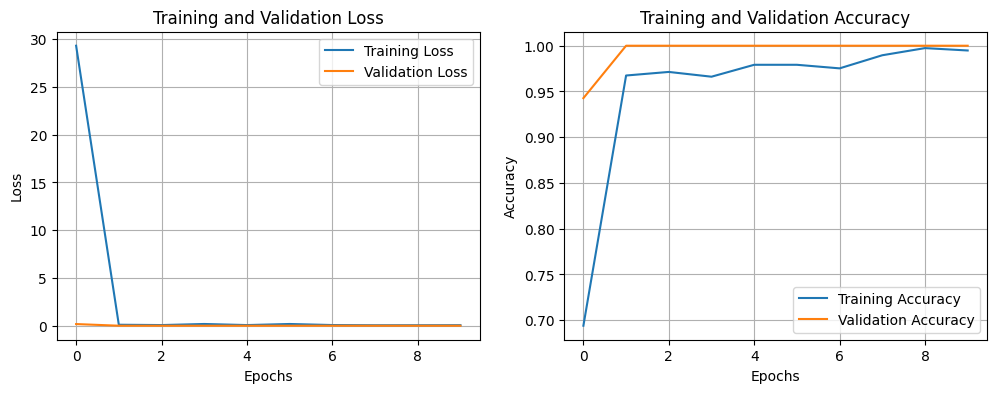

In [10]:
import matplotlib.pyplot as plt



# Plot training loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()


1/1 [==============================] - 0s 292ms/step


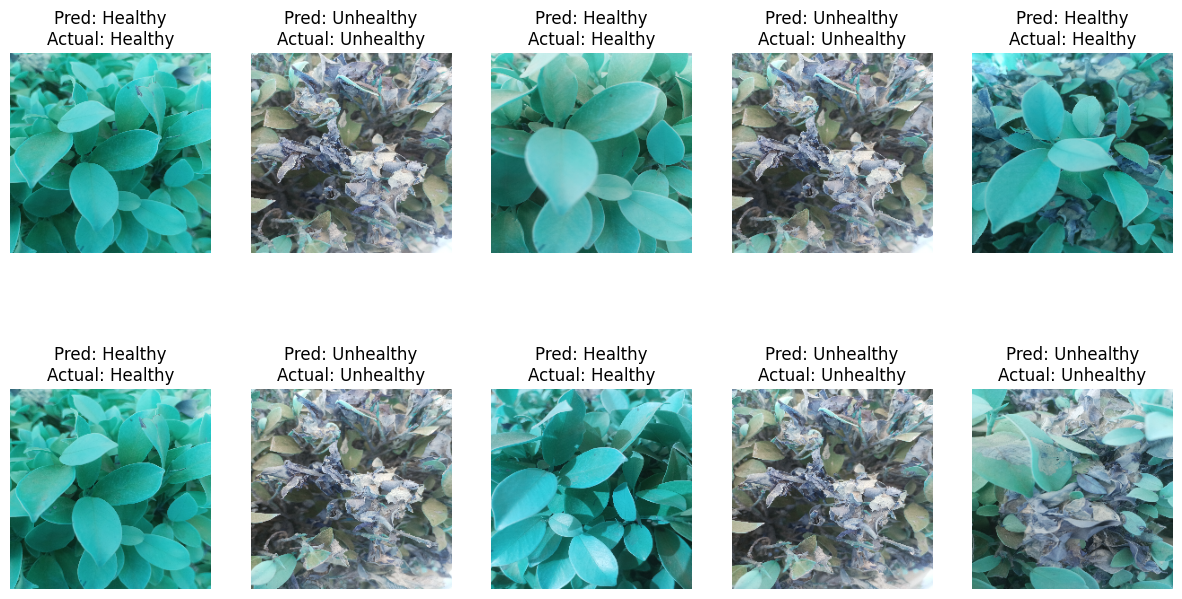

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming class_names is defined as ['Healthy', 'Unhealthy']
class_names = ['Healthy', 'Unhealthy']

# Function to visualize sample images with predicted labels
def visualize_predictions(model, X, y_true, class_names, num_samples=10):
    predictions = model.predict(X)
    predicted_labels = np.argmax(predictions, axis=1)
    
    plt.figure(figsize=(15, 8))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[i].astype("uint8"))
        plt.title(f'Pred: {class_names[predicted_labels[i]]}\nActual: {class_names[y_true[i]]}')
        plt.axis('off')

    plt.show()

# Visualize predictions on a subset of test data
subset_indices = np.random.choice(len(X_test), size=10, replace=False)
X_subset = X_test[subset_indices]
y_true_subset = y_test[subset_indices]

visualize_predictions(model, X_subset, y_true_subset, class_names)


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred_one_hot = model.predict(X_test)
y_pred = np.argmax(y_pred_one_hot, axis=1)

# Convert true labels to single-dimensional array
y_true = np.argmax(y_test_one_hot, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Display confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)


6/6 [==============================] - 0s 15ms/step
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Confusion Matrix:
[[ 86   0]
 [  0 106]]


## Now Trying with batchsize of 64, epochs 20 and learning rate 0.01 to check models performance

In [18]:
# NOW TRYING WITH DIFFRENT NUMBER OF EPOCHS AND BATCH AND LR TO CHECK MODEL PERFORMANCE
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Function to load and preprocess images with resizing
def load_and_resize_images(folder_path, label, target_size=(224, 224)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        
        # Resize the image to a target size
        img = cv2.resize(img, target_size)
        
        # Perform any additional preprocessing if needed
        images.append(img)
        labels.append(label)
    
    return images, labels

# Load healthy plant images and labels with resizing
healthy_images, healthy_labels = load_and_resize_images(healthy_path, label=0)

# Load unhealthy plant images and labels with resizing
unhealthy_images, unhealthy_labels = load_and_resize_images(unhealthy_path, label=1)

# Combine the datasets
X = np.concatenate((healthy_images, unhealthy_images), axis=0)
y = np.concatenate((healthy_labels, unhealthy_labels), axis=0)

# Convert labels to numpy array
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=2)
y_test_one_hot = to_categorical(y_test, num_classes=2)

# Build the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))  # 2 classes: Healthy and Unhealthy

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_one_hot, epochs=20, validation_data=(X_test, y_test_one_hot),batch_size=64)







Epoch 1/20
12/12 [==============================] - 5s 101ms/step - loss: 2660.5361 - accuracy: 0.5247 - val_loss: 6.7709 - val_accuracy: 0.5781
Epoch 2/20
12/12 [==============================] - 1s 84ms/step - loss: 11.1225 - accuracy: 0.6602 - val_loss: 1.0944 - val_accuracy: 0.4479
Epoch 3/20
12/12 [==============================] - 1s 83ms/step - loss: 0.5351 - accuracy: 0.5234 - val_loss: 0.4206 - val_accuracy: 0.7500
Epoch 4/20
12/12 [==============================] - 1s 82ms/step - loss: 0.3561 - accuracy: 0.8698 - val_loss: 0.3411 - val_accuracy: 0.9583
Epoch 5/20
12/12 [==============================] - 1s 83ms/step - loss: 0.2751 - accuracy: 0.9844 - val_loss: 0.2546 - val_accuracy: 1.0000
Epoch 6/20
12/12 [==============================] - 1s 83ms/step - loss: 0.1986 - accuracy: 1.0000 - val_loss: 0.1666 - val_accuracy: 1.0000
Epoch 7/20
12/12 [==============================] - 1s 83ms/step - loss: 0.1325 - accuracy: 0.9961 - val_loss: 0.0939 - val_accuracy: 1.0000
Epoch 8/

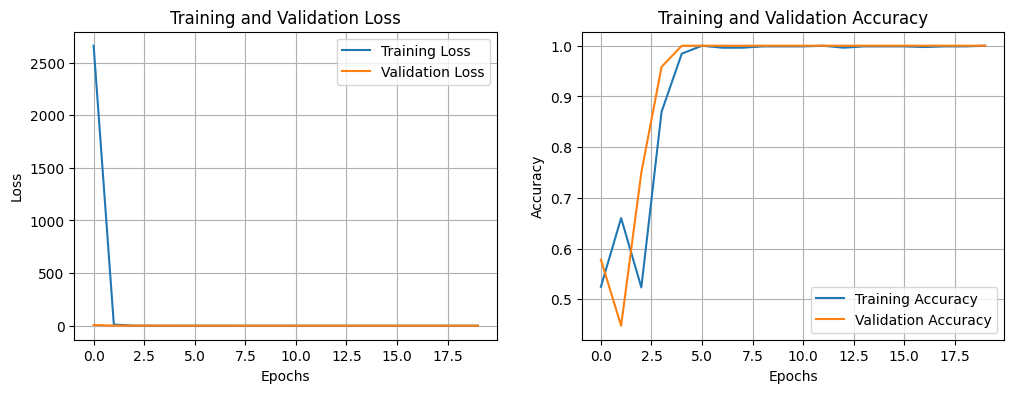

In [19]:
import matplotlib.pyplot as plt



# Plot training loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()


1/1 [==============================] - 0s 83ms/step


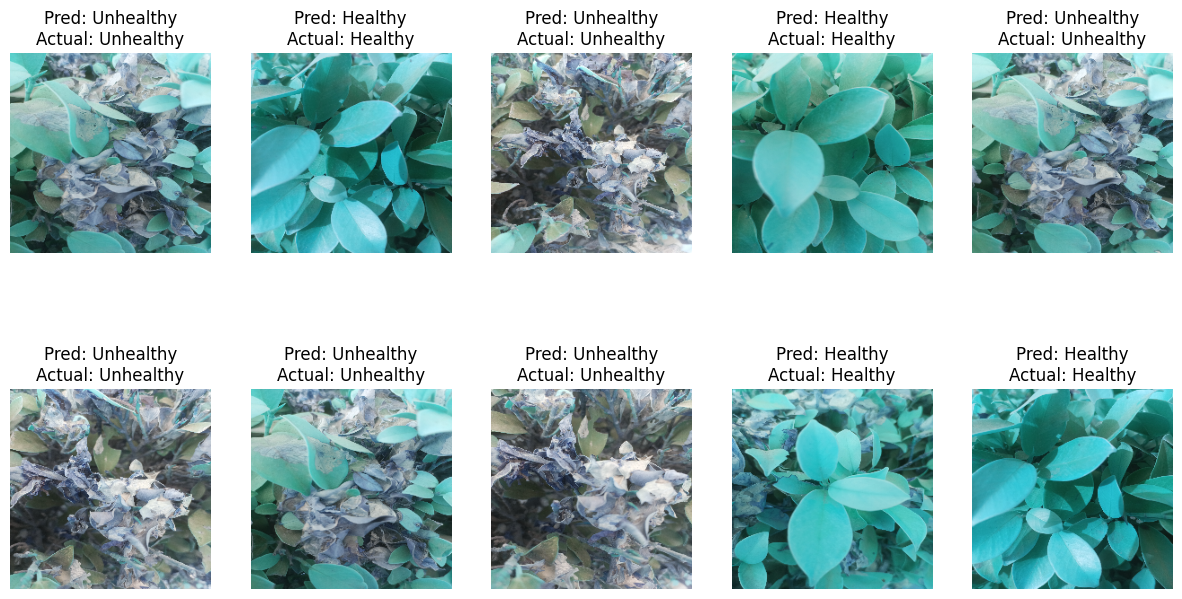

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming class_names is defined as ['Healthy', 'Unhealthy']
class_names = ['Healthy', 'Unhealthy']

# Function to visualize sample images with predicted labels
def visualize_predictions(model, X, y_true, class_names, num_samples=10):
    predictions = model.predict(X)
    predicted_labels = np.argmax(predictions, axis=1)
    
    plt.figure(figsize=(15, 8))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[i].astype("uint8"))
        plt.title(f'Pred: {class_names[predicted_labels[i]]}\nActual: {class_names[y_true[i]]}')
        plt.axis('off')

    plt.show()

# Visualize predictions on a subset of test data
subset_indices = np.random.choice(len(X_test), size=10, replace=False)
X_subset = X_test[subset_indices]
y_true_subset = y_test[subset_indices]

visualize_predictions(model, X_subset, y_true_subset, class_names)


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred_one_hot = model.predict(X_test)
y_pred = np.argmax(y_pred_one_hot, axis=1)

# Convert true labels to single-dimensional array
y_true = np.argmax(y_test_one_hot, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Display confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)


6/6 [==============================] - 0s 15ms/step
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Confusion Matrix:
[[ 86   0]
 [  0 106]]
